In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sb
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#grouping the retailer countries by region
sb.set()
dfreg = pd.DataFrame({"region":[],"Retailer country":[]})
dfreg = dfreg.append({"region":"Americas","Retailer country":"United States"}, ignore_index=True)
dfreg = dfreg.append({"region":"Americas","Retailer country":"Canada"}, ignore_index=True)
dfreg = dfreg.append({"region":"Americas","Retailer country":"Mexico"}, ignore_index=True)
dfreg = dfreg.append({"region":"Americas","Retailer country":"Brazil"}, ignore_index=True)
dfreg = dfreg.append({"region":"Asia","Retailer country":"Japan"}, ignore_index=True)
dfreg = dfreg.append({"region":"Asia","Retailer country":"China"}, ignore_index=True)
dfreg = dfreg.append({"region":"Asia","Retailer country":"Singapore"}, ignore_index=True)
dfreg = dfreg.append({"region":"Asia","Retailer country":"Korea"}, ignore_index=True)
dfreg = dfreg.append({"region":"Asia","Retailer country":"Australia"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Netherlands"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Sweden"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Finland"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Denmark"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"France"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"United Kingdom"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Austria"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Germany"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Belgium"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Italy"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Spain"}, ignore_index=True)
dfreg = dfreg.append({"region":"Europe","Retailer country":"Switzerland"}, ignore_index=True)


In [3]:
df = pd.read_csv(r"C:\Users\phamc\Documents\Data Science Project Working Folder\Retail Sales Marketing Data.csv")
df = pd.merge(df,dfreg, on="Retailer country")
df = df.dropna()
df.head(5)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,region
0,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Telephone,United States,315044.33,437477.15,158371.76,66385.0,2.552857,6.59,156672.57,5.195714,Americas
1,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Sales visit,United States,181287.73,222735.41,88348.13,33799.0,2.720000,6.59,92939.60,5.652222,Americas
2,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Web,United States,340867.26,407123.61,164590.44,61779.0,2.778500,6.59,176276.82,5.838000,Americas
4,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Mail,United States,48205.04,68628.26,24392.09,10414.0,2.495000,6.59,23812.95,5.040000,Americas
6,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Fax,United States,46745.73,50011.51,22008.10,7589.0,2.900000,6.59,24737.63,6.173333,Americas


###### We will be exploring and analyzing Sales Marketing Dataset from a Sports and Outdoor Company. Below will have some visualizations.

# Data Insights

In [4]:
df.info()
#get info on data type
#there is around 24743 entries

print("there is around 24743 data entries")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24743 entries, 0 to 84667
Data columns (total 15 columns):
Year                 24743 non-null int64
Product line         24743 non-null object
Product type         24743 non-null object
Product              24743 non-null object
Order method type    24743 non-null object
Retailer country     24743 non-null object
Revenue              24743 non-null float64
Planned revenue      24743 non-null float64
Product cost         24743 non-null float64
Quantity             24743 non-null float64
Unit cost            24743 non-null float64
Unit price           24743 non-null float64
Gross profit         24743 non-null float64
Unit sale price      24743 non-null float64
region               24743 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 3.0+ MB
there is around 24743 data entries


In [5]:
for col in df.columns:
    print(f'Number of unique{col} labels is {len(df[col].unique())}')

# this will give us the number of unique labels for each column of the dataset. 
# For example, column year has 4 unique labels: 2004-2007

Number of uniqueYear labels is 4
Number of uniqueProduct line labels is 5
Number of uniqueProduct type labels is 21
Number of uniqueProduct labels is 144
Number of uniqueOrder method type labels is 7
Number of uniqueRetailer country labels is 21
Number of uniqueRevenue labels is 24009
Number of uniquePlanned revenue labels is 22972
Number of uniqueProduct cost labels is 22987
Number of uniqueQuantity labels is 7941
Number of uniqueUnit cost labels is 3824
Number of uniqueUnit price labels is 1639
Number of uniqueGross profit labels is 24233
Number of uniqueUnit sale price labels is 7682
Number of uniqueregion labels is 3


In [6]:
print("Number of Product labels")
print("There are about 144 products")
df['Product'].value_counts()
#number of product labels

Number of Product labels
There are about 144 products


Polar Sun                       230
Canyon Mule Climber Backpack    221
Star Dome                       220
TrailChef Cook Set              218
Hibernator Lite                 216
                               ... 
Zodiak                           70
Sky Pilot                        69
Trail Star                       67
Trail Master                     65
Auto Pilot                       44
Name: Product, Length: 144, dtype: int64

In [7]:
print("Number of Product Types")
print("There are about 21 different product types")
df['Product type'].value_counts()
#number of product labels

Number of Product Types
There are about 21 different product types


Lanterns                2397
Eyewear                 2285
Cooking Gear            2059
Watches                 1938
Sleeping Bags           1441
Tents                   1245
Navigation              1240
Knives                  1239
Packs                   1233
Sunscreen               1021
Binoculars              1012
Climbing Accessories     993
First Aid                966
Insect Repellents        957
Tools                    819
Golf Accessories         760
Irons                    729
Woods                    723
Safety                   568
Rope                     567
Putters                  551
Name: Product type, dtype: int64

In [8]:
group = df.groupby(["Product line"])['Gross profit'].apply(lambda x : x.astype(float).sum())
group.head()

# grouping by product line

Product line
Camping Equipment           5.867991e+08
Golf Equipment              3.521936e+08
Mountaineering Equipment    1.632759e+08
Outdoor Protection          4.598328e+07
Personal Accessories        7.765831e+08
Name: Gross profit, dtype: float64

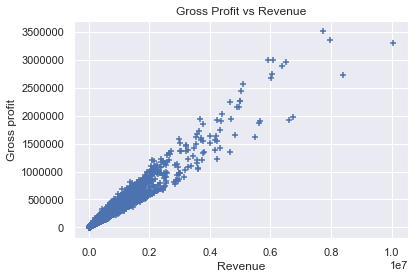

In [9]:
# trying to see a correlation between gross profit and rev
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(df["Revenue"], # x values
df["Gross profit"] # y values
,marker = "+")
ax.set_xlabel("Revenue")
ax.set_ylabel("Gross profit")
ax.set_title("Gross Profit vs Revenue")
plt.show()


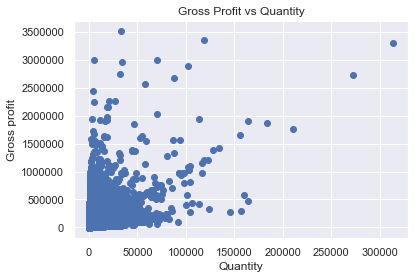

In [10]:
# gross profit over quantity correlation

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(df["Quantity"], # x values
                             df["Gross profit"] # y values
                            )
ax.set_xlabel("Quantity")
ax.set_ylabel("Gross profit")
ax.set_title("Gross Profit vs Quantity")
plt.show()

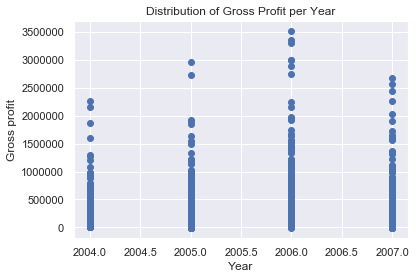

In [11]:
# gross profit over quantity correlation

fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(df["Year"], # x values
                             df["Gross profit"] # y values
                            )
ax.set_xlabel("Year")
ax.set_ylabel("Gross profit")
ax.set_title("Distribution of Gross Profit per Year")
plt.show()

# Area Charts

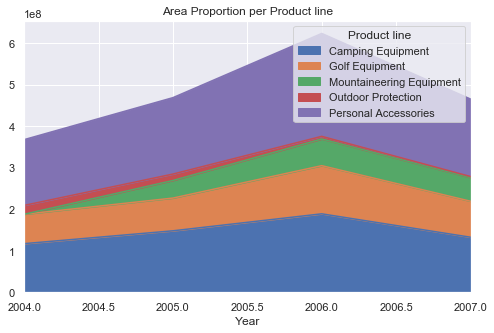

In [12]:
# area chart to show the proportion of each product line

df_unstack = df.groupby(['Year','Product line']).sum().unstack()
plt = df_unstack.plot(kind='area',y='Gross profit', title='Area Proportion per Product line', stacked = True, figsize=[8,5])




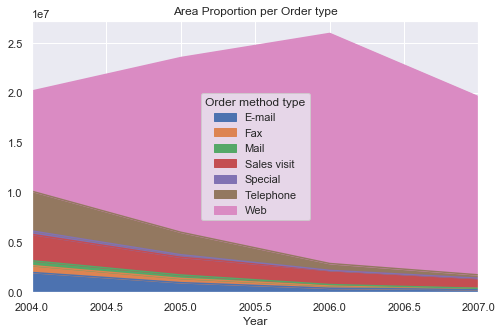

In [13]:
# area chart to show the proportion of each prder type

df_unstack = df.groupby(['Year','Order method type']).sum().unstack()
plt = df_unstack.plot(kind='area',y='Quantity', title='Area Proportion per Order type', stacked = True, figsize=[8,5])


# web sales contribute a whole lot while other ordering methods rapidly decline over time
# Web sales are dominating while the others are fading, good point to indicate what the company should look into

# Bar Charts Visuals

In [14]:
data = pd.read_csv(r"C:\Users\phamc\Documents\Data Science Project Working Folder\Retail Sales Marketing Data.csv")
df = pd.DataFrame(data)
df = pd.merge(df,dfreg, on="Retailer country")
df = df.dropna()
df.head(5)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price,region
0,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Telephone,United States,315044.33,437477.15,158371.76,66385.0,2.552857,6.59,156672.57,5.195714,Americas
1,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Sales visit,United States,181287.73,222735.41,88348.13,33799.0,2.720000,6.59,92939.60,5.652222,Americas
2,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Web,United States,340867.26,407123.61,164590.44,61779.0,2.778500,6.59,176276.82,5.838000,Americas
4,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Mail,United States,48205.04,68628.26,24392.09,10414.0,2.495000,6.59,23812.95,5.040000,Americas
6,2004,Camping Equipment,Cooking Gear,TrailChef Water Bag,Fax,United States,46745.73,50011.51,22008.10,7589.0,2.900000,6.59,24737.63,6.173333,Americas


Text(0, 0.5, 'Gross Profit')

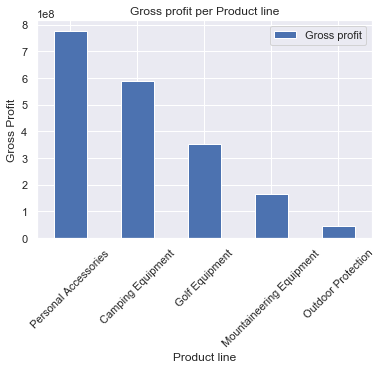

In [15]:
dfgroup = df.groupby('Product line').sum()
dfgroup = dfgroup.sort_values(by='Gross profit', ascending=False) 
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per Product line', rot=45)
plt.set_ylabel('Gross Profit')


Text(0, 0.5, 'Gross Profit')

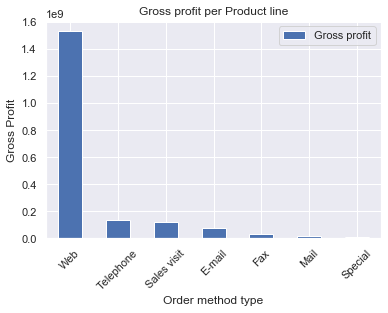

In [16]:
dfgroup = df.groupby('Order method type').sum()
dfgroup = dfgroup.sort_values(by='Gross profit', ascending=False) 
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per Product line', rot=45)
plt.set_ylabel('Gross Profit')


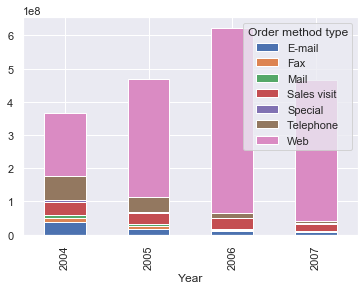

In [17]:
df.groupby(['Year', 'Order method type']).sum().unstack().plot(y='Gross profit', kind='bar', stacked=True)


#Order Method Type over time
#Interesting to see that there were more web sales in 2006. The year 2007 sees a steady decline in ordering.
#Need to figure out what to do when it comes towards recession

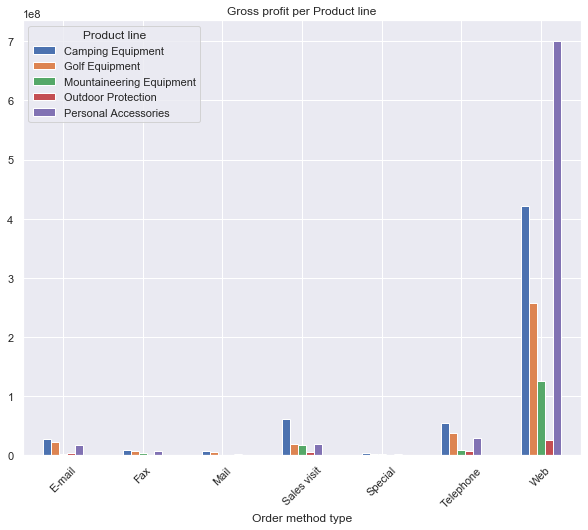

In [18]:
dfgroup = df.groupby(['Order method type', 'Product line']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per Product line', stacked=False, figsize=[10,8], rot=45)

# maybe we should increase outdoor, golf, mountaineering sales


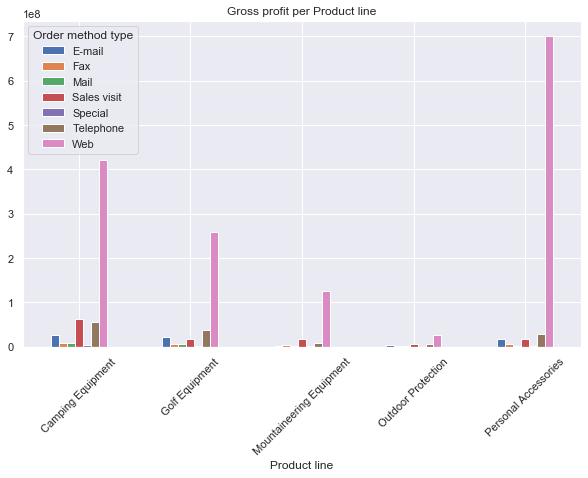

In [19]:
dfgroup = df.groupby(['Product line', 'Order method type']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per Product line', stacked=False, figsize=[10,6], rot=45)

# maybe we should increase outdoor, golf, mountaineering sales

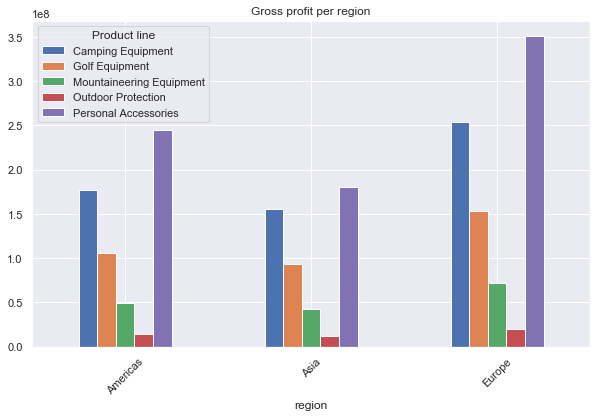

In [20]:
dfgroup = df.groupby(['region', 'Product line']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per region', stacked=False, figsize=[10,6], rot=45)

#need to increase web marketing exposure in Asia

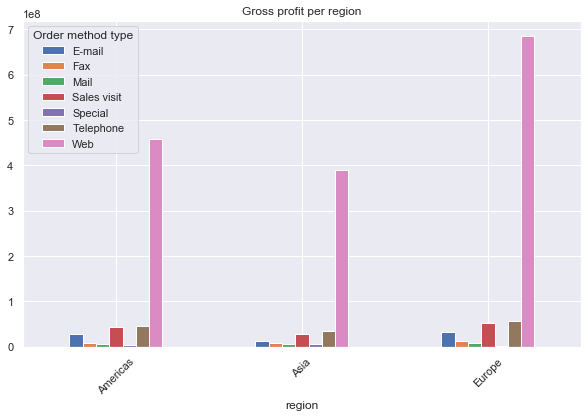

In [21]:
dfgroup = df.groupby(['region', 'Order method type']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='bar', title='Gross profit per region', stacked=False, figsize=[10,6], rot=45)


# maybe we should increase web presence in Asia

# Line Chart

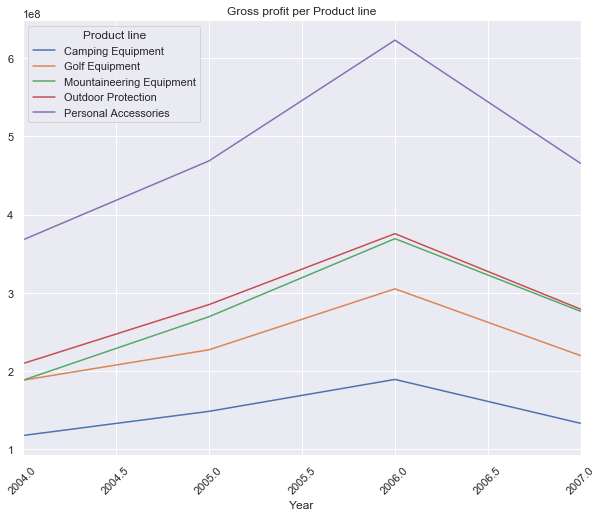

In [22]:
dfgroup = df.groupby(['Year', 'Product line']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='line', title='Gross profit per Product line', stacked=True, figsize=[10,8], rot=45)

# we could see some downward trend due to coming towards recession period

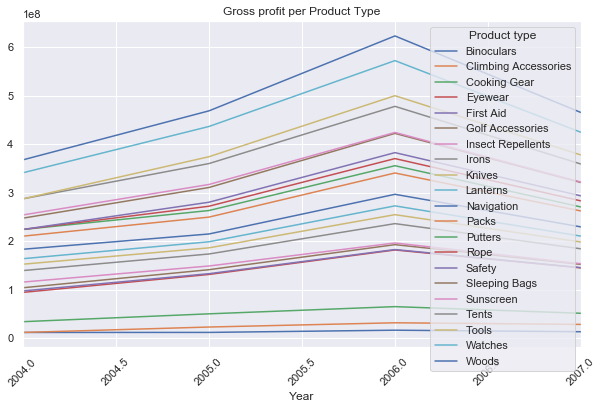

In [23]:
dfgroup = df.groupby(['Year', 'Product type']).sum().unstack()
plt = dfgroup.plot(y ='Gross profit', kind='line', title='Gross profit per Product Type', stacked=True, figsize=[10,6], rot=45)


# line representation of each product type over time
# last three products shwon below are least affected by the recession, need to know WHY

In [24]:
group = df.groupby(["Product"])['Revenue','Gross profit'].apply(lambda x : x.astype(float).sum())
group['Gross_Profit_Margin'] = group['Gross profit'] / group['Revenue'] 
group = group.sort_values(by=['Gross_Profit_Margin'], ascending = False)
group.count()
group.head(5)
# profit per item
#showing top 5

,Revenue,Gross profit,Gross_Profit_Margin
Product,,,
TrailChef Cup,5702502.70,4157413.39,0.729051
BugShield Lotion Lite,2604170.52,1881286.08,0.722413
Course Pro Golf and Tee Set,9033712.92,6353920.52,0.703356
BugShield Spray,4310369.10,2936536.86,0.681273
BugShield Natural,7071303.54,4791529.44,0.677602


In [25]:
#yoy growth on Product Line

dfgroup = df.groupby(['Product line','Year'])['Gross profit'].apply(lambda x : x.astype(float).sum())
dfgroup = dfgroup.unstack('Year')
dfgroup = dfgroup.reset_index()
dfgroup['2007 YOY Growth'] = (dfgroup[2007]-dfgroup[2006])/dfgroup[2006]
dfgroup['2006 YOY Growth'] = (dfgroup[2006]-dfgroup[2005])/dfgroup[2005]
dfgroup['2005 YOY Growth'] = (dfgroup[2005]-dfgroup[2004])/dfgroup[2004]
dfgroup

#Outdoor Production experienced tremendous drop YOY, it was affected the most

Year,Product line,2004,2005,2006,2007,2007 YOY Growth,2006 YOY Growth,2005 YOY Growth
0,Camping Equipment,1.171563e+08,1.480691e+08,1.889428e+08,1.326309e+08,-0.298037,0.276044,0.263859
1,Golf Equipment,7.076639e+07,7.881934e+07,1.159652e+08,8.664269e+07,-0.252856,0.471279,0.113796
2,Mountaineering Equipment,NaN,4.232357e+07,6.423353e+07,5.671881e+07,-0.116991,0.517678,NaN
3,Outdoor Protection,2.134930e+07,1.550153e+07,6.387193e+06,2.745257e+06,-0.570193,-0.587964,-0.273909
4,Personal Accessories,1.583459e+08,1.839701e+08,2.477319e+08,1.865352e+08,-0.247028,0.346587,0.161824


# Linear Regression Model

In [26]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [27]:
df = pd.read_csv(r"C:\Users\phamc\Documents\Data Science Project Working Folder\Retail Sales Marketing Data.csv")
df = df.dropna()

In [28]:
df.shape

(24743, 14)

In [29]:
df.describe()

,Year,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
count,24743.000000,2.474300e+04,2.474300e+04,2.474300e+04,24743.000000,24743.000000,24743.000000,2.474300e+04,24743.000000
mean,2005.345067,1.894183e+05,1.988175e+05,1.116251e+05,3606.559067,84.886432,155.991651,7.779311e+04,147.229912
std,1.073106,3.907509e+05,4.025355e+05,2.384156e+05,8777.721091,131.113339,246.804787,1.581223e+05,232.048812
min,2004.000000,0.000000e+00,1.569000e+01,5.760000e+00,1.000000,0.850000,2.060000,-1.815960e+04,0.000000
25%,2004.000000,1.857921e+04,1.955679e+04,9.431740e+03,328.000000,11.430000,23.000000,8.333060e+03,20.150000
50%,2005.000000,5.986727e+04,6.390684e+04,3.278372e+04,1043.000000,36.828644,66.770000,2.579376e+04,62.650000
75%,2006.000000,1.901930e+05,2.039956e+05,1.113709e+05,3288.000000,80.000000,148.300000,7.825415e+04,140.956667
max,2007.000000,1.005429e+07,1.005429e+07,6.756853e+06,313628.000000,690.000000,1359.720000,3.521098e+06,1307.802727


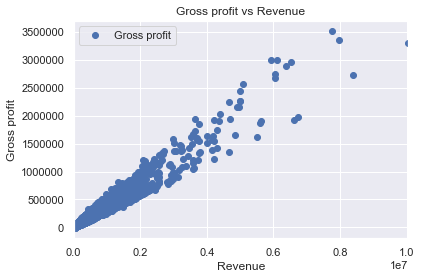

In [30]:
df.plot(x='Revenue', y='Gross profit', style='o')  
plt.title('Gross profit vs Revenue')  
plt.xlabel('Revenue')  
plt.ylabel('Gross profit')  
plt.show()


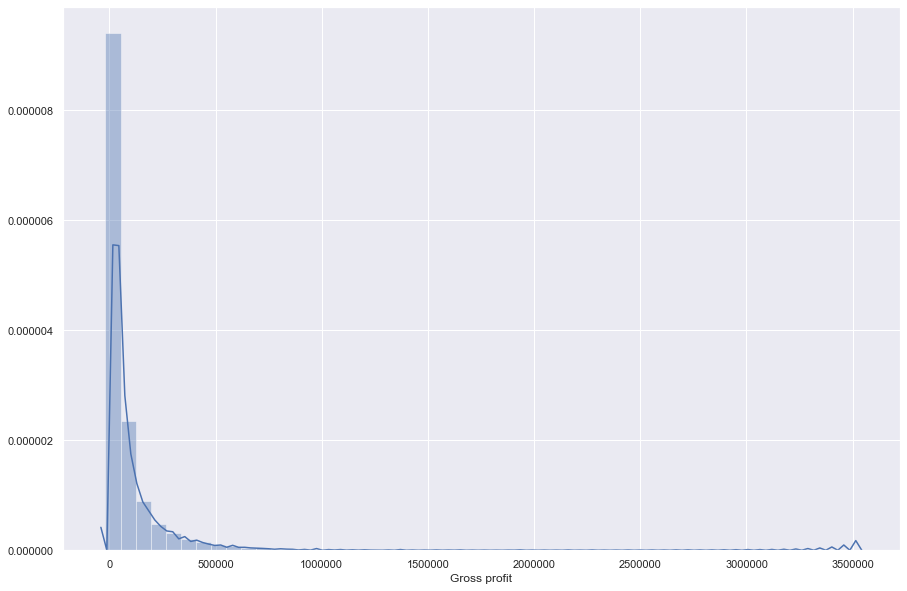

In [31]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Gross profit'])

In [32]:
X = df['Revenue'].values.reshape(-1,1)
y = df['Gross profit'].values.reshape(-1,1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

print("The result should be approximately 45844.96869471 and 8.7945224 respectively. This means that for every one unit of change in Quantity, the change in the Gross profit is about 8.79")

[3479.05395249]
[[0.39128363]]
The result should be approximately 45844.96869471 and 8.7945224 respectively. This means that for every one unit of change in Quantity, the change in the Gross profit is about 8.79


In [36]:
y_pred = regressor.predict(X_test)

In [37]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,60937.87,74183.770540
1,34327.95,26018.986401
2,56554.62,35772.102518
3,39557.05,35614.200010
4,116434.33,103128.949440
...,...,...
4944,7722.12,9849.589634
4945,9754.20,11410.216554
4946,-186.00,3479.053952
4947,156034.59,111946.901602


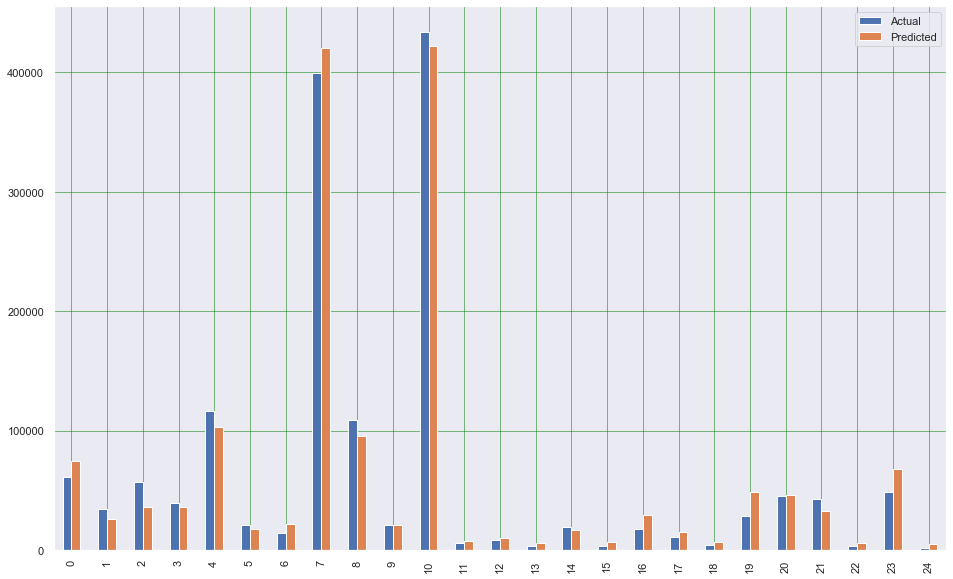

In [38]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Prediction vs Test data


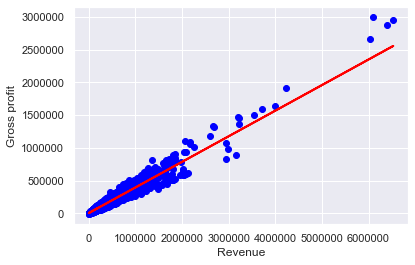

In [39]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Revenue')
plt.ylabel('Gross profit')
print('Prediction vs Test data')
plt.show()

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4985B2108>,
      dtype=object)

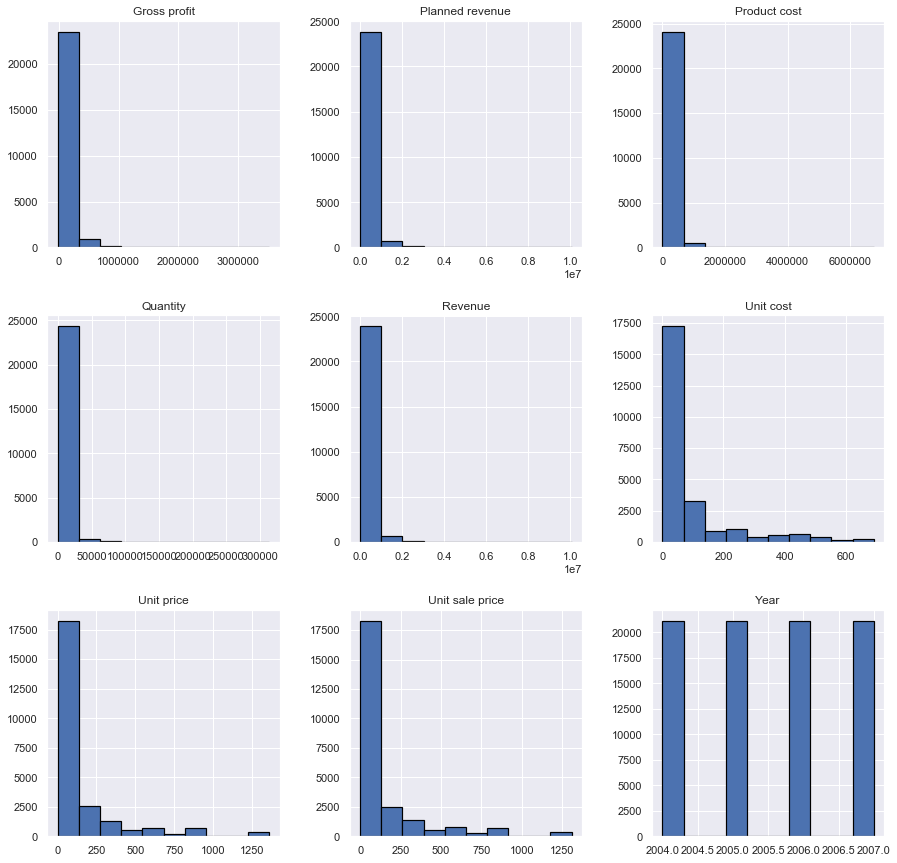

In [40]:
df = pd.read_csv(r"C:\Users\phamc\Documents\Data Science Project Working Folder\Retail Sales Marketing Data.csv")

#creating a histogram for every variable
df.hist(edgecolor='black', linewidth=1.2, figsize=[15,15])

# Seaborn #

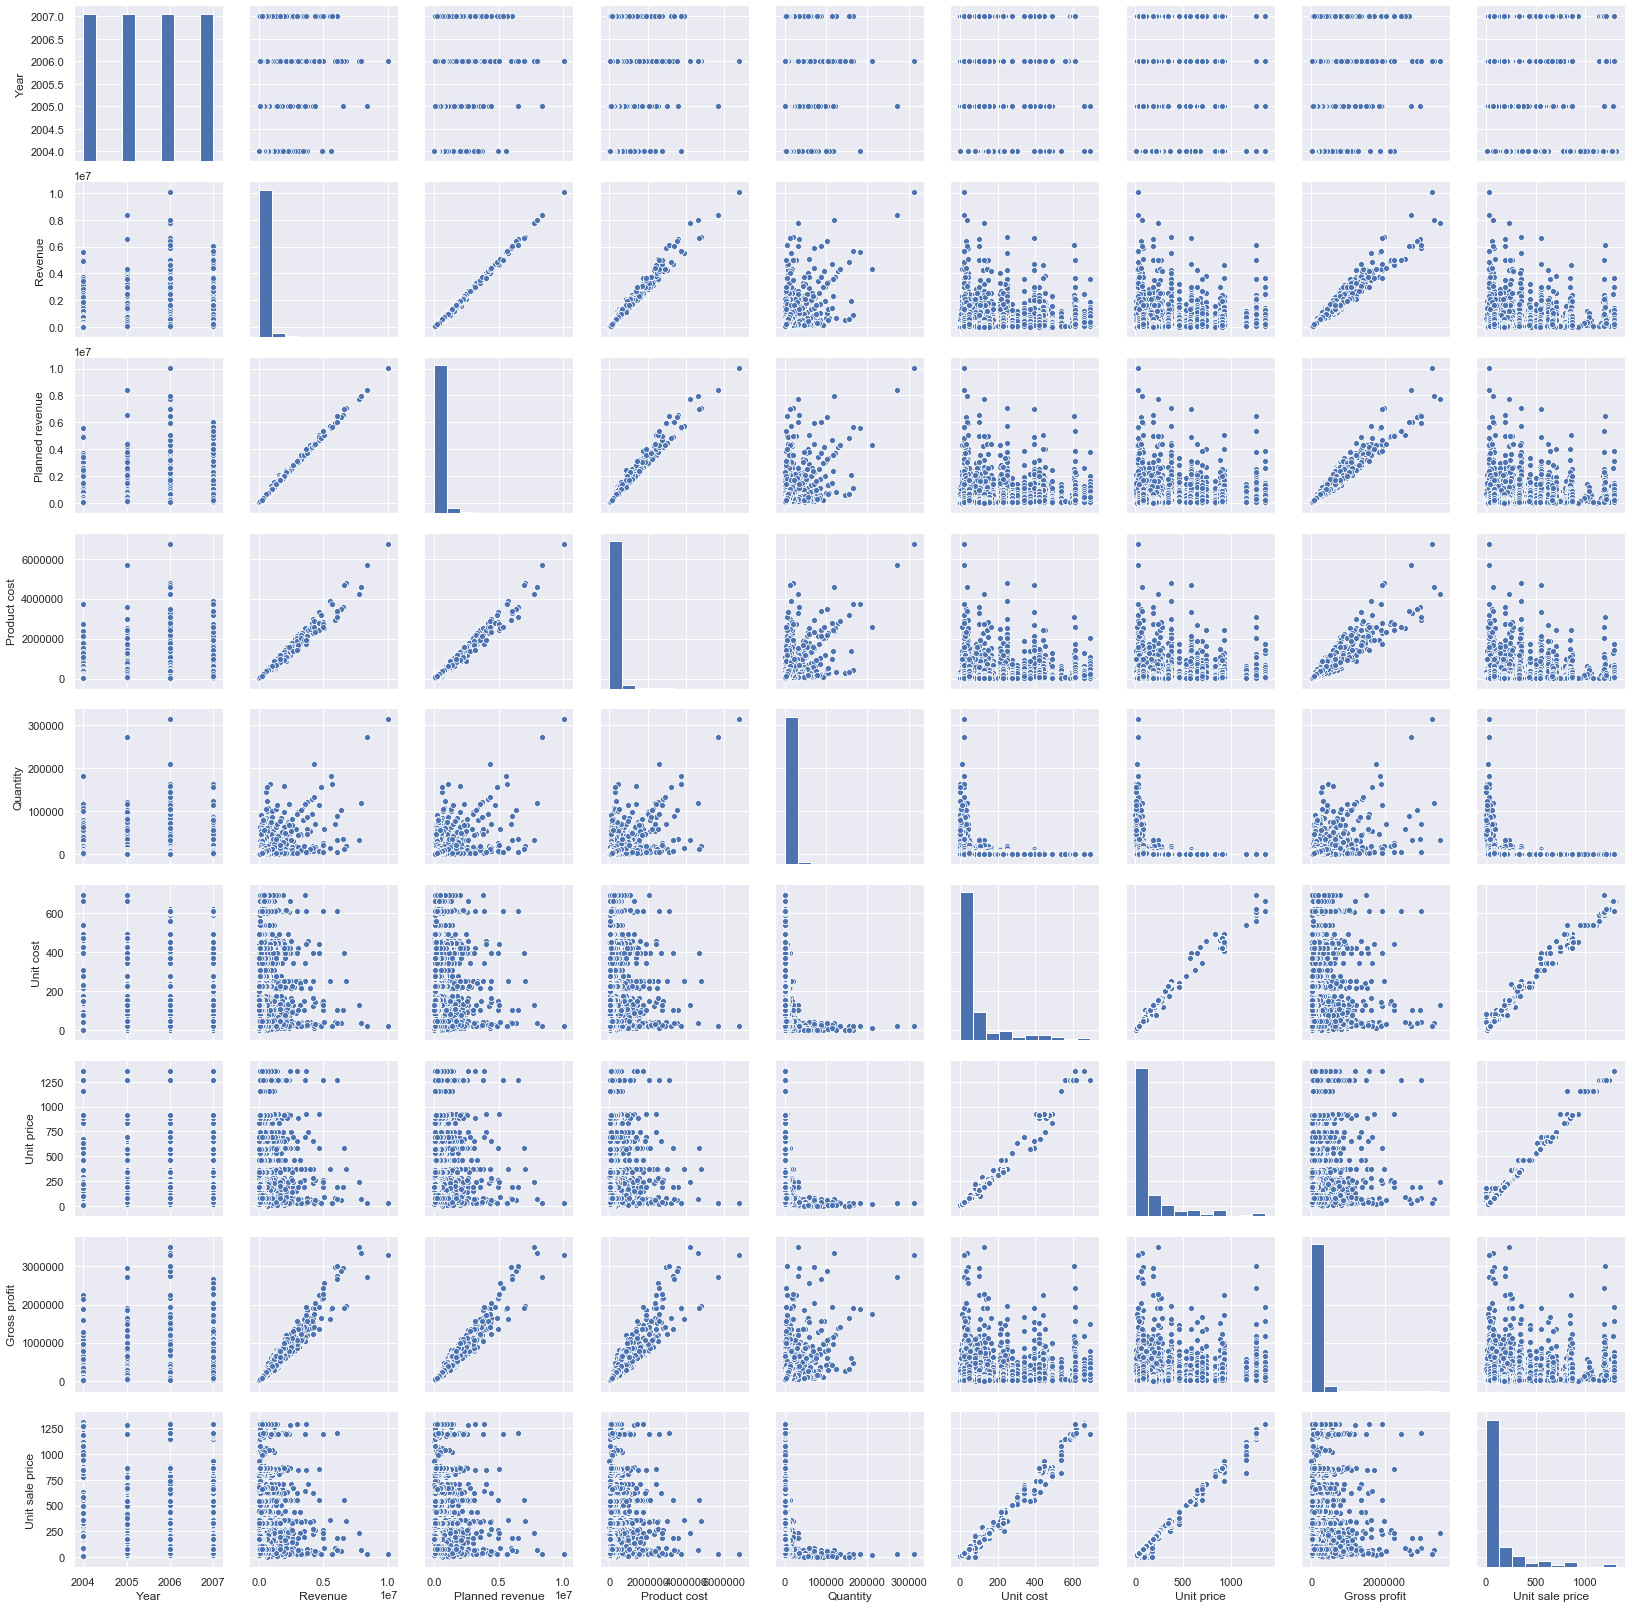

In [42]:
sb.pairplot(df)

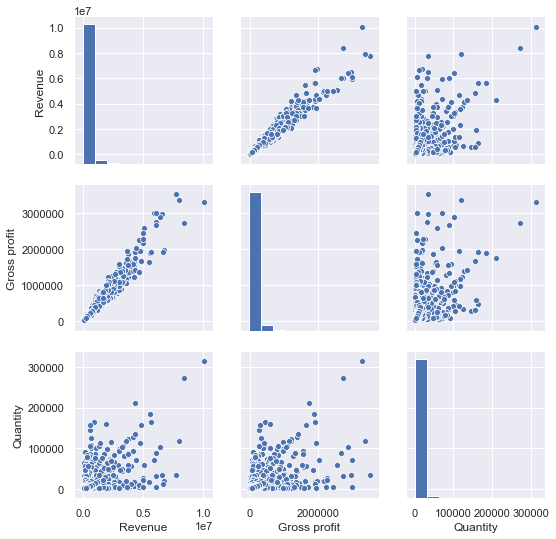

In [50]:
X = df[['Revenue', 'Gross profit', 'Quantity']]
sb.pairplot(X)

# we could see that revenue and gross profit are correlly lineated

# Heatmap Correlation

In [68]:
corr = df.corr()
corr

,Year,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Year,1.000000,0.115565,0.115897,0.106944,0.060784,-0.013209,-0.009350,0.124335,-0.005736
Revenue,0.115565,1.000000,0.999059,0.990357,0.505598,0.246344,0.233281,0.977941,0.236045
Planned revenue,0.115897,0.999059,1.000000,0.989579,0.499477,0.255005,0.242103,0.976788,0.244408
Product cost,0.106944,0.990357,0.989579,1.000000,0.506130,0.241509,0.219441,0.939573,0.222011
Quantity,0.060784,0.505598,0.499477,0.506130,1.000000,-0.168750,-0.167766,0.486292,-0.167453
Unit cost,-0.013209,0.246344,0.255005,0.241509,-0.168750,1.000000,0.988687,0.244619,0.988926
Unit price,-0.009350,0.233281,0.242103,0.219441,-0.167766,0.988687,1.000000,0.245611,0.999275
Gross profit,0.124335,0.977941,0.976788,0.939573,0.486292,0.244619,0.245611,1.000000,0.248567
Unit sale price,-0.005736,0.236045,0.244408,0.222011,-0.167453,0.988926,0.999275,0.248567,1.000000


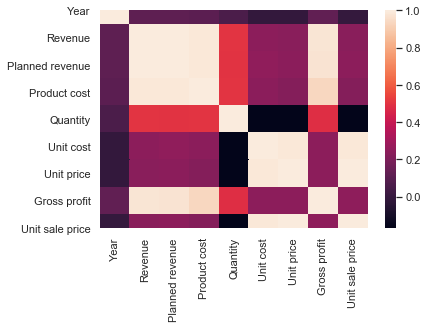

In [69]:
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)